In [36]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing, cross_validation
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.classification import accuracy_score
from sklearn.neighbors.classification import KNeighborsClassifier
from cmath import sqrt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import math
from sklearn import neighbors
import matplotlib.pyplot as mt
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import HashingVectorizer
import warnings
warnings.filterwarnings("ignore")

In [37]:
    train = pd.read_csv('~/Desktop/San Files/trainF.csv', parse_dates=['Dates'])
    test = pd.read_csv('~/Desktop/San Files/test.csv', parse_dates=['Dates'])
#     Removing outliers
#     train=train[train.Y!=90]

In [18]:
#     xy_scaler =preprocessing.StandardScaler()
#     xy_scaler.fit(train[["X","Y"]])
#     train[["X","Y"]]=xy_scaler.transform(train[["X","Y"]])
#     pca=PCA(2)
#     train.loc[:,["X","Y"]]=pca.fit_transform(pd.DataFrame(train.loc[:,["X","Y"]]))
d=train[train.Y!=90]
# df=df[df.X==-120.5]
d.Address.count()

877806

In [19]:

# train.head(5)
# labels.shape
# train.isna().count()

In [20]:
# train.shape
# train.describe()

In [21]:
train.Address.fillna('',inplace=True)
df = pd.Series([ x.replace('/','of') for x in train.Address.tolist() ])
df=pd.DataFrame([ x.split('of') for x in df.tolist()],columns=["Add1","Add2"])
train=pd.concat([train,df["Add1"],df["Add2"]],axis=1)
# train.head(5)

In [22]:

vectorizer = HashingVectorizer(n_features=100)
# encode document
vector = vectorizer.transform(train.Address)
v1=vectorizer.transform(train.Add1)
v2=vectorizer.transform(train.Add2)

In [23]:
svd=TruncatedSVD(n_components=10, random_state=42)
train["AddSVD"]=pd.DataFrame(svd.fit_transform(vector)).loc[:,1]
train["Add1SVD"]=pd.DataFrame(svd.fit_transform(v1)).loc[:,1]
train["Add2SVD"]=pd.DataFrame(svd.fit_transform(v2)).loc[:,1]

In [24]:
train.Descript.fillna('',inplace=True)
vector = vectorizer.transform(train.Descript)
svd=TruncatedSVD(n_components=10, random_state=42)
train["DesSVD"]=pd.DataFrame(svd.fit_transform(vector)).loc[:,1]

In [25]:
#     Removing outliersmy
train=train[train.Y!=90]

In [26]:
dklabel=pd.DataFrame(pd.concat([pd.DataFrame(train.X),pd.DataFrame(train.Y)],axis=1))
kmeans = KMeans(n_clusters=200,max_iter=300)
kmeans.fit(dklabel)
labels = kmeans.predict(dklabel)
centroids = kmeans.cluster_centers_


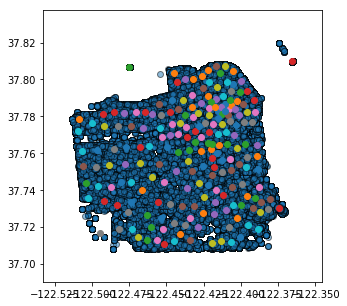

In [27]:
fig = mt.figure(figsize=(5, 5))

# colors = map(lambda x: colmap[x+1], labels)

mt.scatter(dklabel['X'], dklabel['Y'], alpha=0.5,cmap=mt.get_cmap('jet'), edgecolor='k')
for idx, centroid in enumerate(centroids):
#     mt.scatter(*centroid, color=colmap[idx+1])
    mt.scatter(*centroid)
# mt.xlim(0, 80)
# mt.ylim(0, 80)
mt.show()

In [28]:
train["Klabels"]=labels

In [29]:
train["AddSVD"].fillna(0,inplace=True)
train["DesSVD"].fillna(0,inplace=True)

In [ ]:
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(train.Category)

In [ ]:
# def divmon(m):
#     if (m>=1 and m<=2): return 'A'
#     if (m>=3 and m<=5): return 'B'
#     if (m>=5 and m<=9): return 'C'
#     if (m==10): return 'D'
#     if (m>=11 and m<=12): return 'E'
mon = train.Dates.dt.month
# mon = pd.DataFrame([divmon(m) for m in mon.tolist()])
mon=pd.get_dummies(mon,prefix='m')


In [ ]:

# crime = train.Category
# crime = pd.get_dummies(train.Category) 
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
# hour = train.Dates.dt.hour
hour = pd.get_dummies(train.Dates.dt.hour,prefix='h')
minu = train.Dates.dt.minute
# train["hour"] = train["hour"]*60+minu
# address = pd.get_dummies(train.Address)
# desc = pd.get_dummies(train.Descript)
minu = pd.get_dummies(minu)

# train["Klabels"]=labels


In [ ]:
    train_data = pd.concat([train.Id,train.Klabels,train.Klabels,minu,mon, days,hour,district,train.X,train.Y,train.AddSVD,train.Add1SVD,train.Add2SVD,train.DesSVD], axis=1)
    train_data['crime'] = crime
#     train_data['hour'] = hour
#     train_data['mon'] = mon

#     train_data.head(5)

In [ ]:
# train_data.columns

In [ ]:
   days = pd.get_dummies(test.DayOfWeek)
    district = pd.get_dummies(test.PdDistrict)
    minu = test.Dates.dt.minute
    minu = pd.get_dummies(minu)
    hour = pd.get_dummies(test.Dates.dt.hour,prefix='h')
#     hour = test.Dates.dt.hour
#     test["hour"] = test["hour"]*60+minu

#     address = le_crime.fit_transform(test.Address)
#     desc = le_crime.fit_transform(test.Descript)
    
    mon = test.Dates.dt.month
#     mon = pd.DataFrame([divmon(m) for m in mon.tolist()])

    mon=pd.get_dummies(mon,prefix='m')
    
#     test[["X","Y"]]=xy_scaler.fit_transform(test[["X","Y"]])
#     pca=PCA(2)
#     test.loc[:,["X","Y"]]=pca.fit_transform(pd.DataFrame(test.loc[:,["X","Y"]]))
    
    d = pd.Series([ x.replace('/','of') for x in test.Address.tolist() ])
    d=pd.DataFrame([ x.split('of') for x in d.tolist()],columns=["Add1","Add2"])
    test=pd.concat([test,d["Add1"],d["Add2"]],axis=1)
    
    vector = vectorizer.transform(test.Address)
    v1=vectorizer.transform(test.Add1)
    v2=vectorizer.transform(test.Add2)
    
    svd=TruncatedSVD(n_components=10, random_state=42)
    test["AddSVD"]=pd.DataFrame(svd.fit_transform(vector)).loc[:,1]
    test["Add1SVD"]=pd.DataFrame(svd.fit_transform(v1)).loc[:,1]
    test["Add2SVD"]=pd.DataFrame(svd.fit_transform(v2)).loc[:,1]
    
    vector = vectorizer.transform(test.Descript)
    test["DesSVD"]=pd.DataFrame(svd.fit_transform(vector)).loc[:,1]

    df=pd.DataFrame(pd.concat([pd.DataFrame(test.X),pd.DataFrame(test.Y)],axis=1))
#     kmeans = KMeans(n_clusters=200,max_iter=300)
#     kmeans.fit(df)
    labels = kmeans.predict(dklabel)
    centroids = kmeans.cluster_centers_
    test["Klabels"]=labels

In [ ]:
    test_data = pd.concat([test.Id,minu,mon, days,district,test.X,test.Y,test.AddSVD,test.Add1SVD,test.Add2SVD,test.DesSVD], axis=1)

    test_data['hour'] = hour
#     test_data['mon'] = mon
#     test_data.columns

In [ ]:
features1 = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday', 
            'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION','NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL',
            'TENDERLOIN','Id'] + [x for x in range(0, 59)]+ [x for x in (set(pd.DataFrame(hour).columns))]
# +[x for x in (set(pd.DataFrame(mon).columns))]
#             ,'Add2SVD'
#     ,'hour'
features2 = ['AddSVD','X','Y','DesSVD','Klabels']
features = features1+features2

In [ ]:
# features

In [ ]:
# le_crime = preprocessing.LabelEncoder()
# crime = le_crime.transform(train.Category)
# crime = train.Category
# crime = pd.get_dummies(train.Category)
le = preprocessing.LabelEncoder()
days = le.fit_transform(train.DayOfWeek)
district = le.fit_transform(train.PdDistrict)
minu = train.Dates.dt.minute
# train["hour"] = train["hour"]*60+minu
# address = pd.get_dummies(train.Address)
# desc = pd.get_dummies(train.Descript)
# minu = le_crime.fit_transform(minu)

train_data1 = pd.concat([train.Id,abs(train.Y),abs(train.AddSVD),abs(train.DesSVD)], axis=1)
train_data1['minu']=minu
train_data1['days']=days
train_data1['district']=district
train_data1['crime']=crime
train_data1["hour"] = train.Dates.dt.hour

features3 = ['AddSVD','Id','Y','DesSVD','days','district'] 
features4 = ['days','district','minu','hour','Klabels']
# train_data1.head(5)
  

In [ ]:
count=0
ll= pd.DataFrame(np.random.normal(0,1,(16,5)),columns=["Training Size","Log LossBNB","Log LossGNB","Log LossMNB","Log LossMIX"])
# ll= pd.DataFrame(np.random.normal(0,1,(16,2)),columns=["Neighbours","Log Loss"])
train_data[features].head(5)

In [ ]:
count=0
for j in range(60,90,5):
    train_data = shuffle(train_data)
    training, validation = train_test_split(train_data, train_size=(j/100))
    training=train_data

    train_data1 = shuffle(train_data1)
    training1, validation1 = train_test_split(train_data1, train_size=(j/100))
    
    ll.at[count,["Training Size"]]=str(j)
    model = GaussianNB()
    model.fit(training[features], training['crime'])
    predicted = np.array(model.predict_proba(validation[features]))
    ll.at[count,["Log LossGNB"]]=str(log_loss(validation['crime'], predicted))
    model = BernoulliNB()
    model.fit(training[features], training['crime'])
    predicted = np.array(model.predict_proba(validation[features]))
    ll.at[count,["Log LossBNB"]]=str(log_loss(validation['crime'], predicted))
    
#     modelMNB = MultinomialNB()
    modelBNB = BernoulliNB()
    modelGNB = GaussianNB()
    modelBNB.fit(training[features1], training['crime'])
    modelGNB.fit(training[features2], training['crime'])
#     modelMNB.fit(training[features5], training['crime'])
#     calculating the log loss function with the validation section and printing the value
# class_prior Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
    pos_prior = modelGNB.class_prior_
    predictedBNB = np.array(modelBNB.predict_proba(validation[features1]))
    predictedGNB = np.array(modelGNB.predict_proba(validation[features2]))
#     predictedMNB = np.array(modelMNB.predict_proba(validation[features5]))
    predicted = (predictedBNB)* (predictedGNB/pos_prior)
    ll.at[count,["Log LossMIX"]]=str(log_loss(validation['crime'], predicted))
    
   
    model = MultinomialNB()
    model.fit(training1[features3], training1['crime'])
    predictedm = np.array(model.predict_proba(validation1[features3]))
    ll.at[count,["Log LossMNB"]]=str(log_loss(validation1['crime'], predictedm))
    

    
    count=count+1


In [ ]:
ll

In [ ]:
# modelMNB.class_prior

In [ ]:
# KNN
# train_data = shuffle(train_data)
# training, validation = train_test_split(train_data, train_size=.67)
# n_neighbors=1500
# # for n_neighbors in range(200,400,50):
# # for i, weights in enumerate(['uniform', 'distance']):
# knn = neighbors.KNeighborsRegressor(n_neighbors,n_jobs=100)
# knn.fit(training[features],training[list(pd.DataFrame(crime).columns)])
# predicted = knn.predict(validation[features])
# ll.at[count,["Neighbours"]]=str(n_neighbors)
# ll.at[count,["Log Loss"]]=str(log_loss(validation[list(pd.DataFrame(crime).columns)], predicted))
# count=count+1

In [ ]:
# crime = le_crime.transform(train.Category)
# pd.DataFrame(predicted).head(5)


In [ ]:
# ll

In [ ]:
# model = BernoulliNB()
# model.fit(train_data[features], train_data['crime'])
# predicted = model.predict_proba(test_data[features])
# predicted=pd.DataFrame(predicted, columns = le_crime.classes_)
# result=pd.concat([predicted,test_data['Id']],axis=1)
# result.to_csv('~/Desktop/San Files/submitNB.csv')
modelBNB = BernoulliNB()
modelGNB = GaussianNB()
modelBNB.fit(train_data[features1], train_data['crime'])
modelGNB.fit(train_data[features2], train_data['crime'])
pos_prior = modelGNB.class_prior_
predictedBNB = np.array(modelBNB.predict_proba(test_data[features1]))
predictedGNB = np.array(modelGNB.predict_proba(test_data[features2]))
predicted = (predictedBNB)* ( predictedGNB/pos_prior)

predicted=pd.DataFrame(predicted, columns = le_crime.classes_)
# pd.DataFrame(predicted).head(5)
result=pd.concat([predicted,test_data['Id']],axis=1)
result.to_csv('~/Desktop/San Files/submit.csv')

In [ ]:
# KNN 
# n_neighbors=10
# knn = neighbors.KNeighborsRegressor(n_neighbors)
# knn.fit(train_data[features],train_data[list(pd.DataFrame(crime).columns)])
# predicted = knn.predict(test_data[features])
# predicted = pd.DataFrame(predicted, columns = list(pd.DataFrame(crime).columns))
# result=pd.concat([predicted,test_data['Id']],axis=1)
# result.to_csv('~/Desktop/San Files/submitNB.csv')

In [ ]:
pd.DataFrame(predicted)

In [ ]:
#     predicted_val = model.predict(test_data[features])
#     predicted_val = le_crime.inverse_transform(predicted_val)
#     result = pd.DataFrame(predicted_val)
#     result.to_csv('~/Desktop/San Files/resultsNB.csv', index=False)
    